In [ ]:
pip install heartpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


df = pd.read_csv("/content/data_text_1.csv",   warn_bad_lines=True, error_bad_lines=False)

df=df.drop(['Unnamed: 2'], axis=1)
df.columns = ['GSR', 'ECG']
df=df.drop(309371)
df['ECG']=df['ECG'].str[0:-2]
df=df[pd.to_numeric(df['ECG'], errors='coerce').notnull()]
df=df[pd.to_numeric(df['GSR'], errors='coerce').notnull()]
df = df.astype({'ECG': float, 'GSR': float})
# df['GSR'] = df[df.GSR >= 1.593831e+04]
df.drop(df[df['GSR'] >= 1.593831e+04].index, inplace = True)
df.drop(df[df['GSR'] <= 800].index, inplace = True)
df



<ipython-input-19-65d943b0611a>:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/data_text_1.csv",   warn_bad_lines=True, error_bad_lines=False)
<ipython-input-19-65d943b0611a>:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/data_text_1.csv",   warn_bad_lines=True, error_bad_lines=False)
<ipython-input-19-65d943b0611a>:6: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data_text_1.csv",   warn_bad_lines=True, error_bad_lines=False)


,GSR,ECG
0,1018.00,2146.00
1,1017.00,2175.00
2,1016.00,2137.00
3,1015.00,2178.00
4,972.00,2192.00
...,...,...
445327,949.25,1106.75
445330,946.00,2411.13
445332,955.12,1842.13
445334,949.37,886.81


In [ ]:
GSR=df['GSR']
data2=df['GSR'][ : 7500]
GSR=pd.to_numeric(GSR)
# data2=df['GSR'][ : 7500]

data2=np.array(data2)
GSR.describe().transpose()


count    402170.000000
mean       1005.703643
std          10.625114
min         800.450000
25%        1004.000000
50%        1007.000000
75%        1010.000000
max        1023.000000
Name: GSR, dtype: float64

In [ ]:
ECG=df['ECG']
data1=df['ECG'][ : 7500]
ECG=pd.to_numeric(ECG)
data1=np.array(data1)
ECG.describe()

count    402170.000000
mean       1860.747756
std         346.840416
min           0.000000
25%        1799.000000
50%        1875.000000
75%        1965.000000
max        4095.000000
Name: ECG, dtype: float64

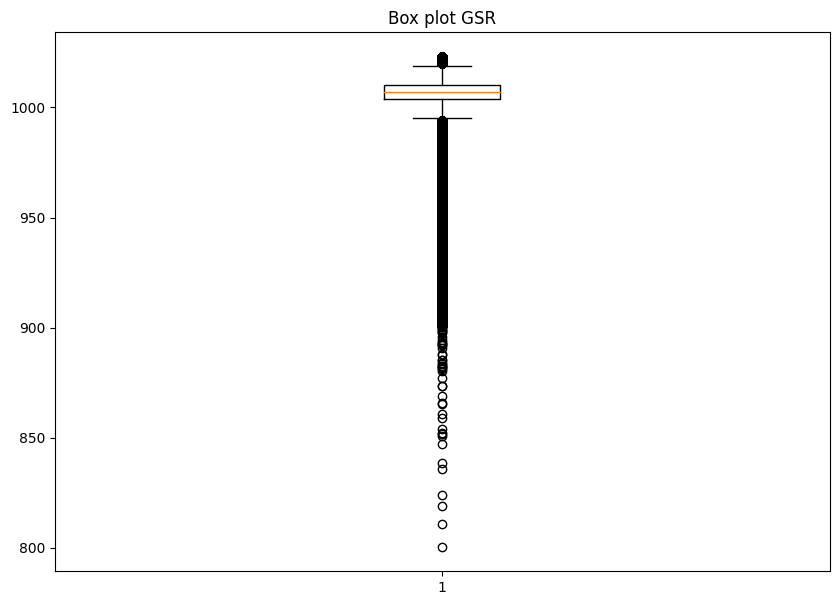

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(GSR)
plt.title('Box plot GSR')
# show plot
plt.show()

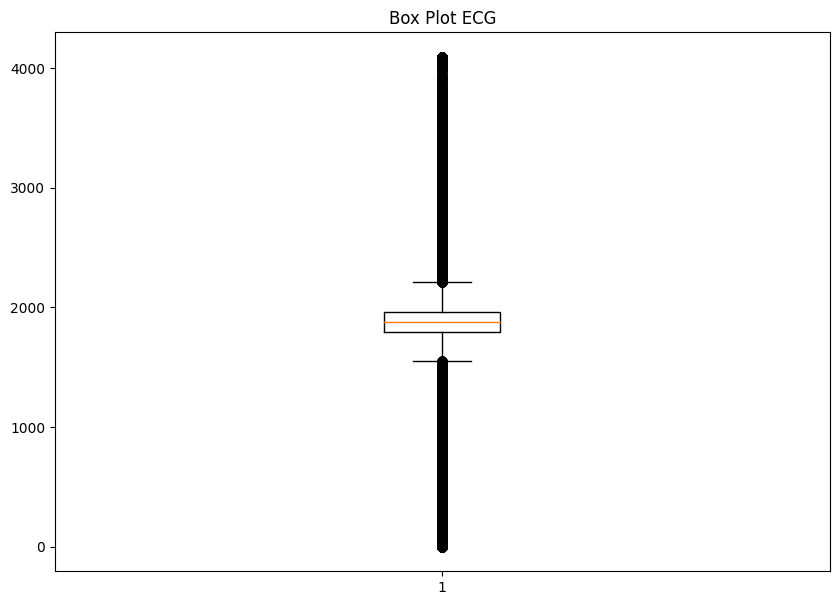

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(ECG)
plt.title('Box Plot ECG')
# show plot
plt.show()

In [ ]:
import numpy as np
import heartpy as hp

sample_rate = 125

In [ ]:
def filter_and_visualise(data, sample_rate):
    '''
    function that filters using remove_baseline_wander
    and visualises result
    '''
    # filtered = hp.enhance_ecg_peaks(hp.scale_data(data), sample_rate, aggregation='median', iterations=5)
    filtered = hp.remove_baseline_wander(data, sample_rate)
    # filtered = hp.enhance_ecg_peaks(hp.scale_data(filtered), sample_rate, aggregation='median', iterations=5)

    plt.figure(figsize=(12,3))
    plt.title(' ECG Signal with baseline wander removed')
    plt.plot(filtered)
    plt.show()

    #And let's plot both original and filtered signal, and zoom in to show peaks are not moved
    #We'll also scale both signals with hp.scale_data
    #This is so that they have the same amplitude so that the overlap is better visible
    plt.figure(figsize=(12,4))
    plt.title('ECG signal zoomed in with baseline wander removed, original signal overlaid')
    plt.plot(hp.scale_data(data[200:1200]),label ='Original Noisy')
    plt.plot(hp.scale_data(filtered[200:1200]),alpha=0.7,label ='Filtered')
    # Function add a legend
    plt.legend(["Original Noisy", "Filtered"], loc ="lower right")
    plt.show()

    return filtered

# filtered = filter_and_visualise(data1, sample_rate)

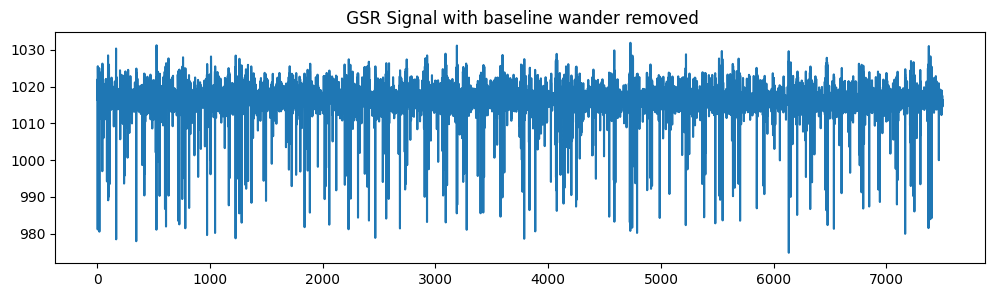

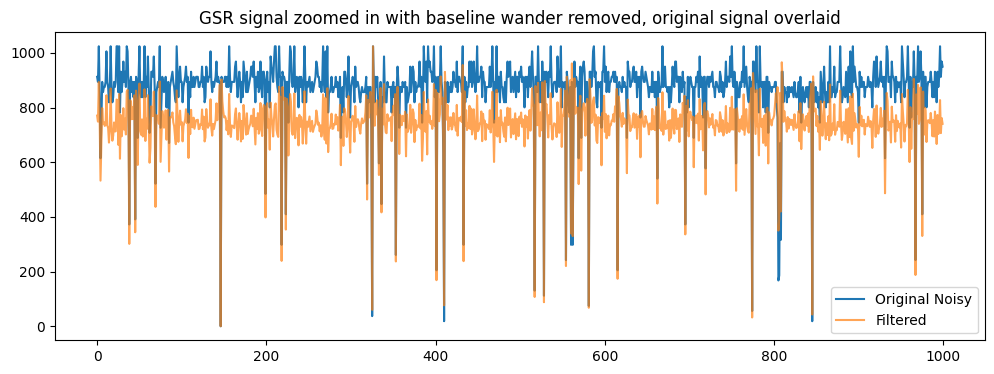

In [ ]:
filtered_GSR = filter_and_visualise(data2, sample_rate)

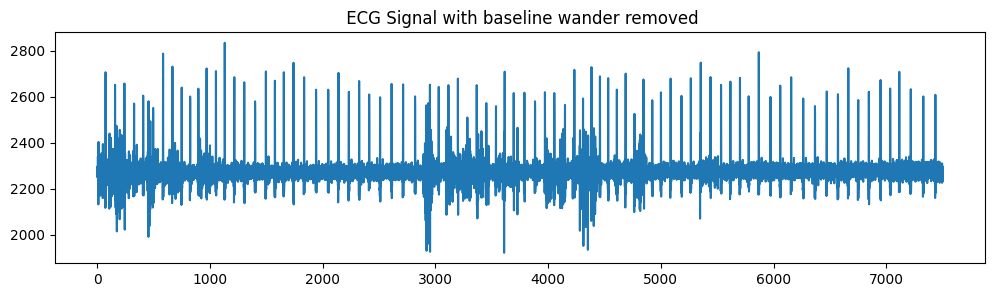

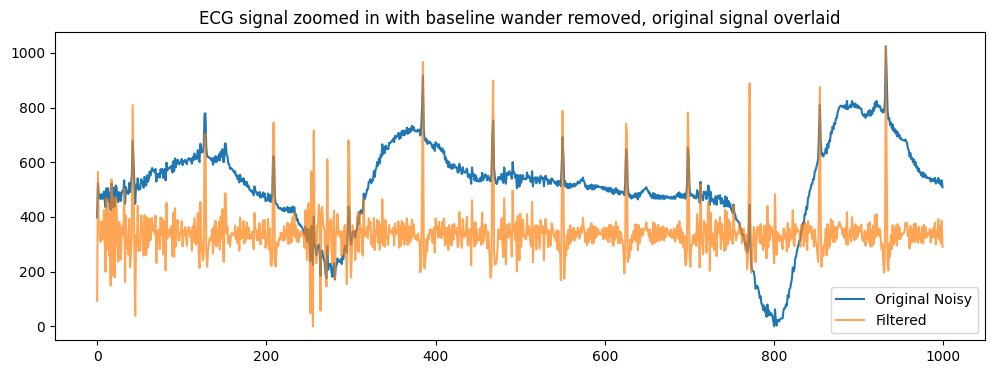

In [ ]:
filtered_ECG = filter_and_visualise(data1, sample_rate)


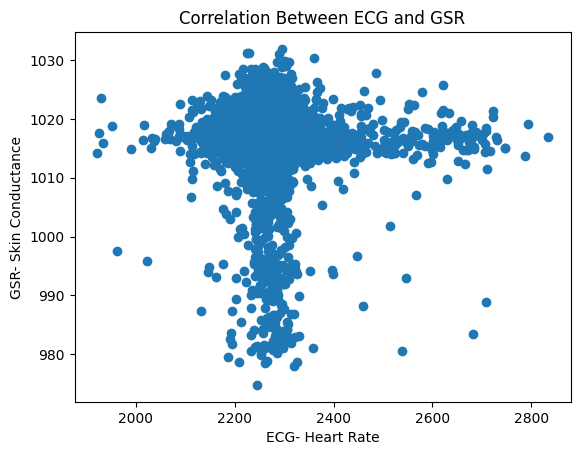

In [ ]:
plt.scatter(filtered_ECG, filtered_GSR)
plt.title('Correlation Between ECG and GSR')
plt.xlabel("ECG- Heart Rate")
plt.ylabel("GSR- Skin Conductance")
plt.show()
#  As the Heart Rate Increases The Skin Conductance Is Increasing and is in the upper range
#  As the the Heart range Noramlizes the GSR values tends to Decrease.
#  At the peak value of the ECG signals the GSR is also at the maximum and when the Diastole is taking place the GSR is at its lower bounds.


<class 'dict'>
bpm: 72.443814
ibi: 828.228070
sdnn: 93.389554
sdsd: 46.946975
rmssd: 75.153177
pnn20: 0.718310
pnn50: 0.492958
hr_mad: 73.333333
sd1: 53.052717
sd2: 121.651510
s: 20275.660166
sd1/sd2: 0.436104
breathingrate: 0.166667


<Figure size 1200x400 with 0 Axes>

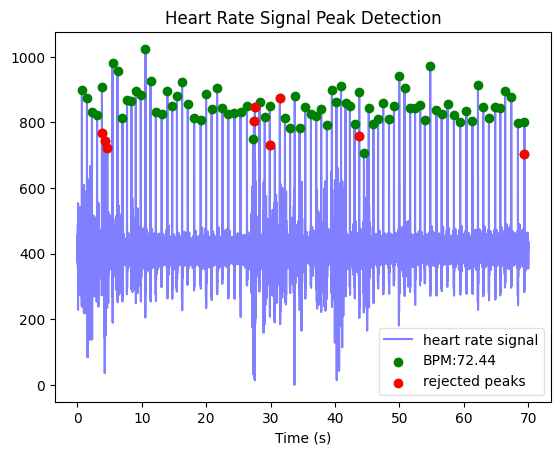

In [ ]:
from scipy.signal import resample

resampled_signal = resample(filtered_ECG, len(filtered_ECG) *7)

wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate *6)
print(type(wd))
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

# #plot poincare
# hp.plot_poincare(wd, m)

# poincare_measures = ['sd1', 'sd2', 's', 'sd1/sd2']
# for measure in poincare_measures:
#     print('%s: %f' %(measure, m[measure]))

In [ ]:
heart=[]
heart_graph=[]

for i in range(3750,len(ECG),3750):
    data_ecg=df['ECG'][ min(i, len(ECG))-3750: min(i, len(ECG))]
    data_gsr=df['GSR'][ min(i, len(ECG))-3750: min(i, len(ECG))]
    # filtering ECG
    filtered=hp.remove_baseline_wander(data_ecg, sample_rate)
    resampled_signal = resample(filtered, len(filtered) *7)
    wd, m = hp.process(hp.scale_data(resampled_signal), sample_rate *6)
    #  filtering GSR
    filtered_gsr=hp.remove_baseline_wander(data_gsr, sample_rate)
    m['gsr_mean']=filtered_gsr.mean()
    m['gsr_std']=filtered_gsr.std()
    heart.append(m)
    heart_graph.append(wd)
    #  filtering GSR

wdf=pd.DataFrame(heart_graph)
hdf=pd.DataFrame(heart)
hdf


/usr/local/lib/python3.9/dist-packages/numpy/ma/core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_fitpack2.py:298: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squa

,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,gsr_mean,gsr_std
0,73.163522,820.080808,88.560164,40.501963,63.262513,0.689655,0.413793,57.333333,44.626605,119.466856,16749.087790,0.373548,0.147869,1016.397422,5.455914
1,72.092278,832.266667,97.908892,49.08782,83.327017,0.763158,0.552632,80.000000,58.888489,123.861679,22914.861988,0.475438,0.266667,1011.697374,5.225307
2,2547.169811,23.555556,27.040893,36.396565,44.915379,0.260870,0.130435,0.666667,31.759969,21.737043,2168.854507,1.461099,1.792115,1009.761372,4.847993
3,171.755725,349.333333,103.214125,43.333333,70.281972,0.500000,0.500000,86.666667,39.126575,30.641294,3766.420526,1.276923,0.573066,1010.659201,5.139621
4,260.450161,230.370370,103.351784,18.0,119.364986,1.000000,1.000000,70.666667,83.438600,84.381409,22118.906676,0.988827,0.482859,1053.418434,6.222435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,70.549928,850.461538,64.211572,39.880523,62.405578,0.605263,0.421053,41.333333,44.116246,78.850498,10928.306386,0.559492,0.133333,1009.137403,4.874816
103,207.547170,289.090909,169.106331,140.157626,317.419596,1.000000,1.000000,89.333333,219.761972,108.347753,74803.570030,2.028302,0.314663,1012.516199,5.624447
104,75.653674,793.087719,119.950421,46.732625,71.329872,0.722222,0.416667,94.000000,50.224373,152.233223,24020.046190,0.329917,0.133333,1009.106988,5.389394
105,72.869955,823.384615,71.038433,36.288053,55.416191,0.647059,0.352941,43.333333,38.339466,91.657085,11039.819443,0.418292,0.186933,1021.235504,5.164400


In [ ]:
label=[]
count=0
print(len(hdf['bpm']))
for bpm in hdf['bpm']:
    if bpm >85 or bpm <=55:
        label.append(0)
        count+=1        # not applicable bad data values
    elif (bpm > 55 and bpm <= 63):
        label.append(1) # low heart rate
    elif (bpm > 63 and bpm < 66) :
        label.append(2)  # poor heart rate
    elif bpm >= 66 and bpm <= 74:
        label.append(3) # normal heart rate
    elif bpm > 74 and bpm <= 78:
        label.append(2) # High-work heart rate
    elif bpm >78 and bpm <= 85:
        label.append(1) # abnormally high heart rate
    else:
        bpm=0
        label.append(0)

print("count of NA values: ", count)
print(" Percentage of NA values: ", count/len(label))
label
print(len(label))
hdf['label_bpm']  =label

# saving the dataframe
hdf.to_csv('HeartRate.csv')
wdf.to_csv('GraphHeartRate.csv')
hdf


107
count of NA values:  19
 Percentage of NA values:  0.17757009345794392
107


,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1/sd2,breathingrate,gsr_mean,gsr_std,label_bpm
0,73.163522,820.080808,88.560164,40.501963,63.262513,0.689655,0.413793,57.333333,44.626605,119.466856,16749.087790,0.373548,0.147869,1016.397422,5.455914,3
1,72.092278,832.266667,97.908892,49.08782,83.327017,0.763158,0.552632,80.000000,58.888489,123.861679,22914.861988,0.475438,0.266667,1011.697374,5.225307,3
2,2547.169811,23.555556,27.040893,36.396565,44.915379,0.260870,0.130435,0.666667,31.759969,21.737043,2168.854507,1.461099,1.792115,1009.761372,4.847993,0
3,171.755725,349.333333,103.214125,43.333333,70.281972,0.500000,0.500000,86.666667,39.126575,30.641294,3766.420526,1.276923,0.573066,1010.659201,5.139621,0
4,260.450161,230.370370,103.351784,18.0,119.364986,1.000000,1.000000,70.666667,83.438600,84.381409,22118.906676,0.988827,0.482859,1053.418434,6.222435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,70.549928,850.461538,64.211572,39.880523,62.405578,0.605263,0.421053,41.333333,44.116246,78.850498,10928.306386,0.559492,0.133333,1009.137403,4.874816,3
103,207.547170,289.090909,169.106331,140.157626,317.419596,1.000000,1.000000,89.333333,219.761972,108.347753,74803.570030,2.028302,0.314663,1012.516199,5.624447,0
104,75.653674,793.087719,119.950421,46.732625,71.329872,0.722222,0.416667,94.000000,50.224373,152.233223,24020.046190,0.329917,0.133333,1009.106988,5.389394,2
105,72.869955,823.384615,71.038433,36.288053,55.416191,0.647059,0.352941,43.333333,38.339466,91.657085,11039.819443,0.418292,0.186933,1021.235504,5.164400,3


In [ ]:
X=hdf[['gsr_mean','gsr_std']]
y=hdf[['label_bpm']]
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
# i.e. 90 % training dataset and 10 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)

In [ ]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
# using metrics module for F1_score calculation
print("f1_score OF THE MODEL: ", metrics.f1_score(y_test, y_pred,average='micro'))

<ipython-input-32-4eeee0ee5d80>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)



ACCURACY OF THE MODEL:  0.45454545454545453
f1_score OF THE MODEL:  0.45454545454545453


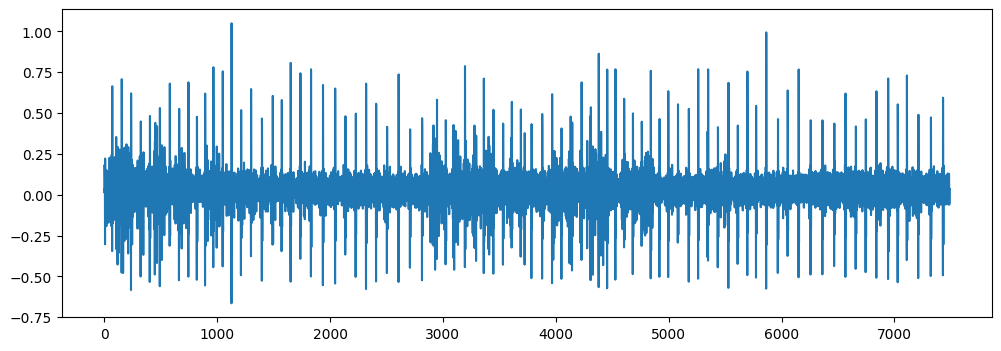

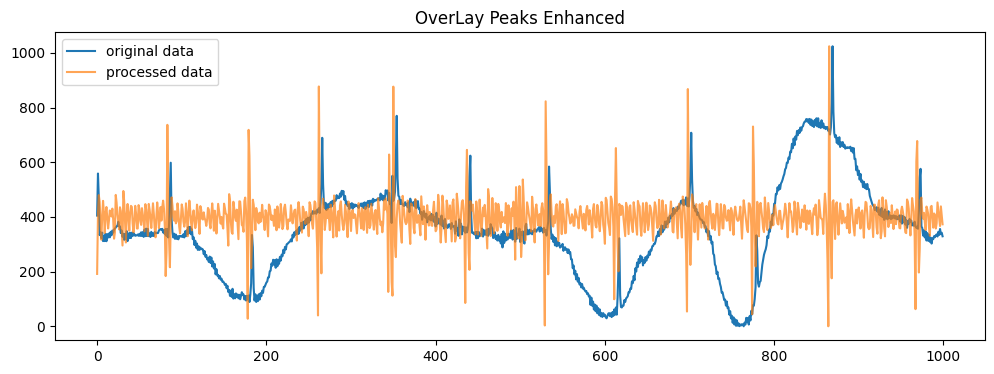

In [ ]:
filtered = hp.enhance_ecg_peaks(hp.scale_data(filtered_ECG), sample_rate,
                                aggregation='median', iterations=5)

#show filtered signal
plt.figure(figsize=(12,4))
plt.plot(filtered)
plt.show()

#zoom in on signal section and overlay filtered segment
plt.figure(figsize=(12,4))
plt.title('original signal zoom in')
plt.plot(hp.scale_data(data1[5000:6000]), label='original data')
plt.title('OverLay Peaks Enhanced')
plt.plot(hp.scale_data(filtered[5000:6000]), alpha=0.7, label='processed data')
plt.legend()
plt.show()